# Proyecto - Analítica Descriptiva

## (1) Descripción del problema:
Para poder desarrollar una aplicación o juego es necesario encontrar la categoría con mayor número de descargas para saber los intéreses de los usuarios.

## (1) Objetivos:
- Determinar la cantidad de apps que hay por rango de edad. 
- Determinar las categorías más descargadas en la PlayStore de Google.
- Determinar las categorías más descargadas por rango de edad.

## (3) Datos:
### a. Fuentes de datos:
La principal fuente de datos es un dataset en formato csv
https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps

### b. Tipos de datos:
En el dataset se tiene datos de tipo:
- String
- Boolean
- Integer
- Otros

### c. Procesamiento:
- Eliminación de datos faltantes o erroneos



### 1. Carga de datos

In [2]:
library("dplyr")
library("na.tools")
library("tidyimpute")
library("ggplot2")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
data <- read.csv('../data/Google-Playstore.csv')

In [4]:
df <- data.frame(data)

In [5]:
df %>%
    head(10)

,App.Name,App.Id,Category,Rating,Rating.Count,Installs,Minimum.Installs,Maximum.Installs,Free,Price,⋯,Developer.Website,Developer.Email,Released,Last.Updated,Content.Rating,Privacy.Policy,Ad.Supported,In.App.Purchases,Editors.Choice,Scraped.Time
,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0,10+,10,15,True,0,⋯,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
2,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64,"5,000+",5000,7662,True,0,⋯,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
3,Vibook,com.doantiepvien.crm,Productivity,0.0,0,50+,50,58,True,0,⋯,,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-and-conditions/privacy-policy,False,False,False,2021-06-15 20:19:35
4,Smart City Trichy Public Service Vehicles 17UCS548,cst.stJoseph.ug17ucs548,Communication,5.0,5,10+,10,19,True,0,⋯,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,,True,False,False,2021-06-15 20:19:35
5,GROW.me,com.horodyski.grower,Tools,0.0,0,100+,100,478,True,0,⋯,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
6,IMOCCI,com.imocci,Social,0.0,0,50+,50,89,True,0,⋯,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018/08/Datenschutzerklärung_IMOCCI_22072018.pdf,False,True,False,2021-06-15 20:19:35
7,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12,"1,000+",1000,2567,True,0,⋯,,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdataprank,True,False,False,2021-06-15 20:19:35
8,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39,500+,500,702,True,0,⋯,,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view/978b22a2fd432de423de81e4ac91d571,False,False,False,2021-06-15 20:19:35
9,WhatsOpen,com.whatsopen.app,Communication,0.0,0,10+,10,18,True,0,⋯,http://yilvermolinah.com,yilver.mh1996@gmail.com,,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/policy.html,False,False,False,2021-06-15 20:19:35


### 2. Se valida si se tiene valores NA

In [6]:
colsNA <- colnames(df)[colSums(is.na(df)) > 0]

colsNA

summary(df[c(colsNA)])

[1] "App.Name"         "Rating"           "Rating.Count"     "Minimum.Installs"

   App.Name             Rating       Rating.Count       Minimum.Installs   
 Length:2312944     Min.   :0.000   Min.   :        0   Min.   :0.000e+00  
 Class :character   1st Qu.:0.000   1st Qu.:        0   1st Qu.:5.000e+01  
 Mode  :character   Median :2.900   Median :        6   Median :5.000e+02  
                    Mean   :2.203   Mean   :     2865   Mean   :1.834e+05  
                    3rd Qu.:4.300   3rd Qu.:       42   3rd Qu.:5.000e+03  
                    Max.   :5.000   Max.   :138557570   Max.   :1.000e+10  
                    NA's   :22883   NA's   :22883       NA's   :107        

Se encuentra valores NA en atributos que nos son relevantes para el tratamiento.

- Se remueven los atributos irrelevantes.

In [30]:
# Se elimina atributos irrelevantes
df2 <- df[,!names(df) %in% c("App.Id","Rating","Rating.Count","Size","Minimum.Android","Developer.Id","Developer.Website","Developer.Email","Privacy.Policy","Ad.Supported","In.App.Purchases","Editors.Choice","Scraped.Time")]

df2 %>% head(10)

,App.Name,Category,Installs,Minimum.Installs,Maximum.Installs,Free,Price,Currency,Released,Last.Updated,Content.Rating
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,Gakondo,Adventure,10+,10,15,True,0,USD,"Feb 26, 2020","Feb 26, 2020",Everyone
2,Ampere Battery Info,Tools,"5,000+",5000,7662,True,0,USD,"May 21, 2020","May 06, 2021",Everyone
3,Vibook,Productivity,50+,50,58,True,0,USD,"Aug 9, 2019","Aug 19, 2019",Everyone
4,Smart City Trichy Public Service Vehicles 17UCS548,Communication,10+,10,19,True,0,USD,"Sep 10, 2018","Oct 13, 2018",Everyone
5,GROW.me,Tools,100+,100,478,True,0,USD,"Feb 21, 2020","Nov 12, 2018",Everyone
6,IMOCCI,Social,50+,50,89,True,0,USD,"Dec 24, 2018","Dec 20, 2019",Teen
7,unlimited 4G data prank free app,Libraries & Demo,"1,000+",1000,2567,True,0,USD,"Sep 23, 2019","Sep 27, 2019",Everyone
8,The Everyday Calendar,Lifestyle,500+,500,702,True,0,USD,"Jun 21, 2019","Jun 21, 2019",Everyone
9,WhatsOpen,Communication,10+,10,18,True,0,USD,,"Dec 07, 2018",Teen


- Como en atributo App.Name se tiene valores NA, estos serán reemplazados con el nombre de la categoria

In [31]:
df2 %>% 
   filter(is.na(App.Name))

print("Atributos con NAs")
colnames(df2)[colSums(is.na(df2)) > 0]

# Se reemplaza el valor NA del App.Name por el nombre la Categoria
df3 <- df2 %>%
   mutate(App.Name = coalesce(App.Name, Category))

# Se vuelve a validar los valores NA para verificar que no se muestre el atributo App.Name reemplazado
print("Atributos con NAs")
colnames(df3)[colSums(is.na(df3)) > 0]

App.Name,Category,Installs,Minimum.Installs,Maximum.Installs,Free,Price,Currency,Released,Last.Updated,Content.Rating
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
NA,News & Magazines,"50,000+",50000,84097,True,0,USD,"Aug 8, 2011","Dec 21, 2020",Everyone


[1] "Atributos con NAs"


[1] "App.Name"         "Minimum.Installs"

[1] "Atributos con NAs"


[1] "Minimum.Installs"

- Los atributos con NA que todavía existen se los reemplaza por el valor de 0

In [32]:
# Como los atributos que todavía tienen NAs son del tipo numérico se reemplaza por ceros
df4 <- df3 %>% impute_zero_all()


print("Atributos con NAs")
colnames(df4)[colSums(is.na(df4)) > 0]

df4 %>% head(10)

[1] "Atributos con NAs"


character(0)

,App.Name,Category,Installs,Minimum.Installs,Maximum.Installs,Free,Price,Currency,Released,Last.Updated,Content.Rating
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,Gakondo,Adventure,10+,10,15,True,0,USD,"Feb 26, 2020","Feb 26, 2020",Everyone
2,Ampere Battery Info,Tools,"5,000+",5000,7662,True,0,USD,"May 21, 2020","May 06, 2021",Everyone
3,Vibook,Productivity,50+,50,58,True,0,USD,"Aug 9, 2019","Aug 19, 2019",Everyone
4,Smart City Trichy Public Service Vehicles 17UCS548,Communication,10+,10,19,True,0,USD,"Sep 10, 2018","Oct 13, 2018",Everyone
5,GROW.me,Tools,100+,100,478,True,0,USD,"Feb 21, 2020","Nov 12, 2018",Everyone
6,IMOCCI,Social,50+,50,89,True,0,USD,"Dec 24, 2018","Dec 20, 2019",Teen
7,unlimited 4G data prank free app,Libraries & Demo,"1,000+",1000,2567,True,0,USD,"Sep 23, 2019","Sep 27, 2019",Everyone
8,The Everyday Calendar,Lifestyle,500+,500,702,True,0,USD,"Jun 21, 2019","Jun 21, 2019",Everyone
9,WhatsOpen,Communication,10+,10,18,True,0,USD,,"Dec 07, 2018",Teen


Con los datos ya preparados se valida las categorías de edad para escoger Everyone y Teen

In [154]:
df4 %>%
    group_by(Content.Rating) %>%
    count()

# playstore <- df4

playstore <- df4 %>%
    filter(Content.Rating == "Teen")

Content.Rating,n
<chr>,<int>
Adults only 18+,136
Everyone,2022089
Everyone 10+,33901
Mature 17+,60289
Teen,196375
Unrated,154


Se encuentra el Máximo y la Suma total del numero de instalaciones por Categoría

In [155]:
playstoreMax <- playstore %>%
    group_by(Category) %>%
    summarise(install.max = max(Maximum.Installs), install.sum = sum(Maximum.Installs))

playstoreMax %>%
    arrange(desc(install.max))

Category,install.max,install.sum
<chr>,<dbl>,<dbl>
Video Players & Editors,9766230924,20105007597
Social,6782619635,25322267165
Entertainment,4605543029,16030749557
Books & Reference,3202676731,4835041812
News & Magazines,2961820154,3782946937
Auto & Vehicles,1976625745,2006946290
Tools,1682763021,2960025532
Music & Audio,1067343725,9768754536
Communication,964831762,2777129412


Como existen categorías de millones de descargas se crea bins de tamaño de 1 millon

In [156]:
playstore <- playstore %>%
    group_by(Category) %>%
    mutate(install.max = max(Maximum.Installs), install.sum = sum(Maximum.Installs))

playstore <- playstore %>%
   mutate(installs.bins = cut(install.max, breaks= 1000000*(0:100000),dig.lab=11),
    installSum.bins = cut(install.sum, breaks= 1000000*(0:100000),dig.lab=11))

In [157]:
playstore %>%
    group_by(Category, installs.bins, installSum.bins) %>%
    arrange(desc(installSum.bins)) %>%
    count()

Category,installs.bins,installSum.bins,n
<chr>,<fct>,<fct>,<int>
Action,"(505000000,506000000]","(12895000000,12896000000]",7987
Adventure,"(163000000,164000000]","(3189000000,3190000000]",5406
Arcade,"(390000000,391000000]","(4521000000,4522000000]",3372
Art & Design,"(117000000,118000000]","(247000000,248000000]",1184
Auto & Vehicles,"(1976000000,1977000000]","(2006000000,2007000000]",720
Beauty,"(7000000,8000000]","(69000000,70000000]",764
Board,"(100000000,101000000]","(970000000,971000000]",1028
Books & Reference,"(3202000000,3203000000]","(4835000000,4836000000]",7658
Business,"(17000000,18000000]","(109000000,110000000]",6033


Se gráfica la cantidad de categoria por rango de instalaciones

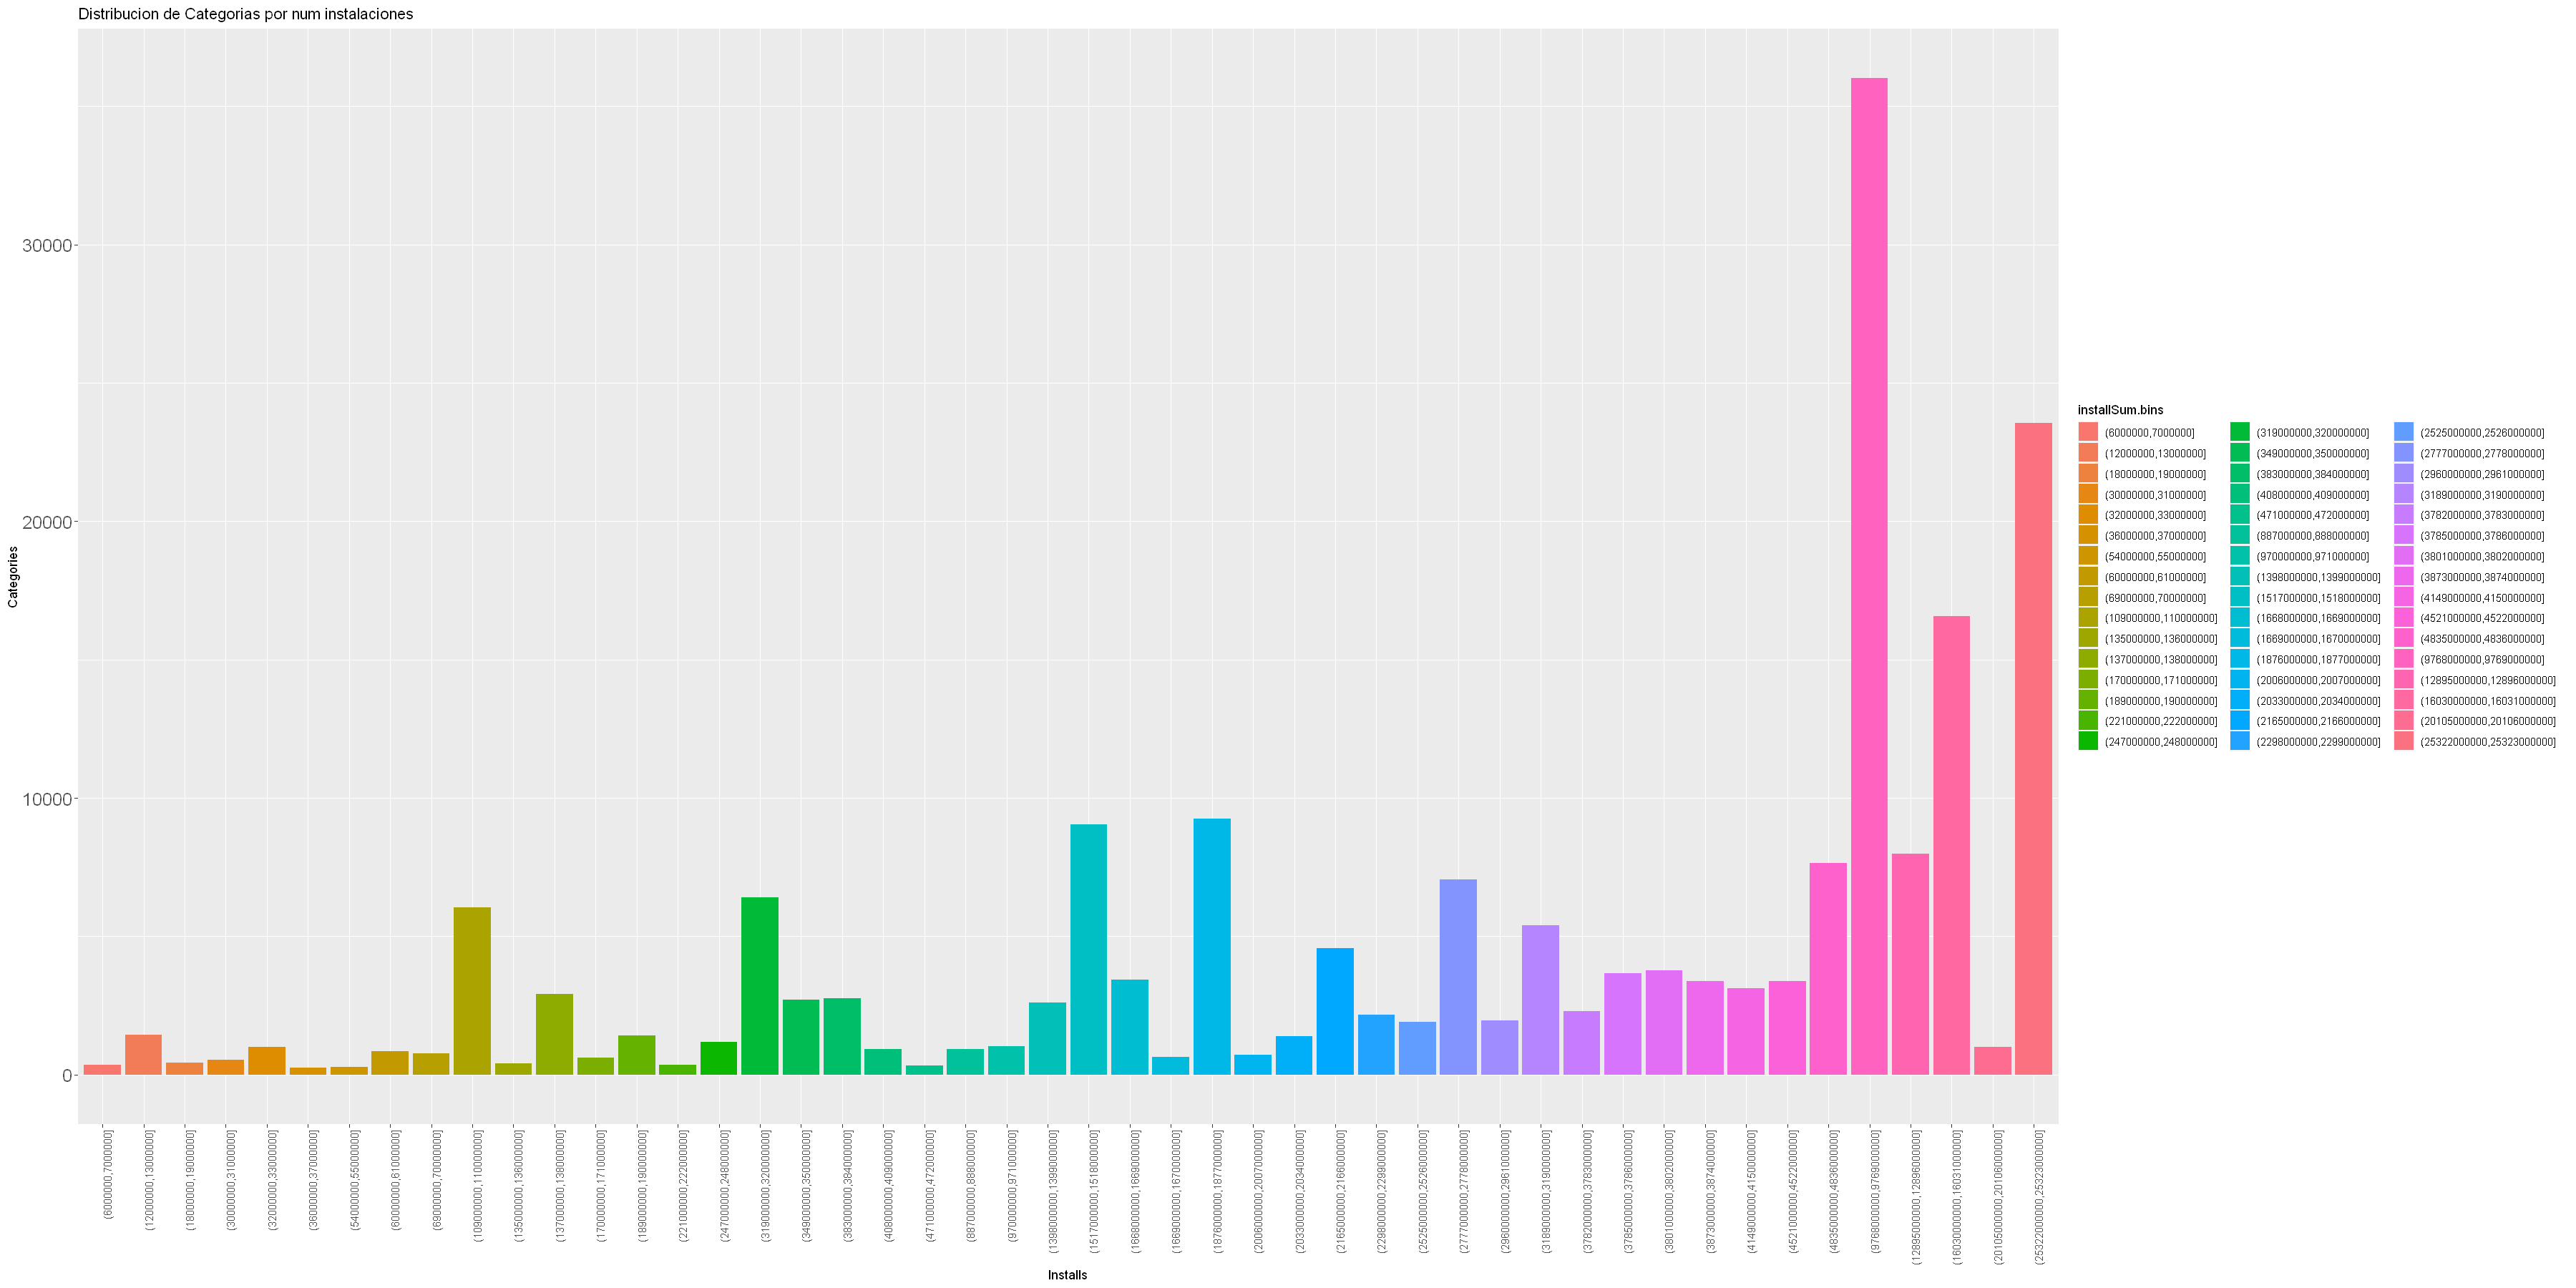

In [165]:
options(repr.plot.width=30, repr.plot.height=15)
playstore %>%
   ggplot(aes(x = installSum.bins, fill=installSum.bins)) +
   geom_bar(position="stack") +
   theme(axis.text.y = element_text(size = 15))+
   ggtitle("Distribucion de Categorias por num instalaciones") +
   xlab("Installs") + ylab("Categories") +
   theme(axis.text.x = element_text(angle = 90, hjust = 1))

Se gráfica el numero de instalaciones por Categoria

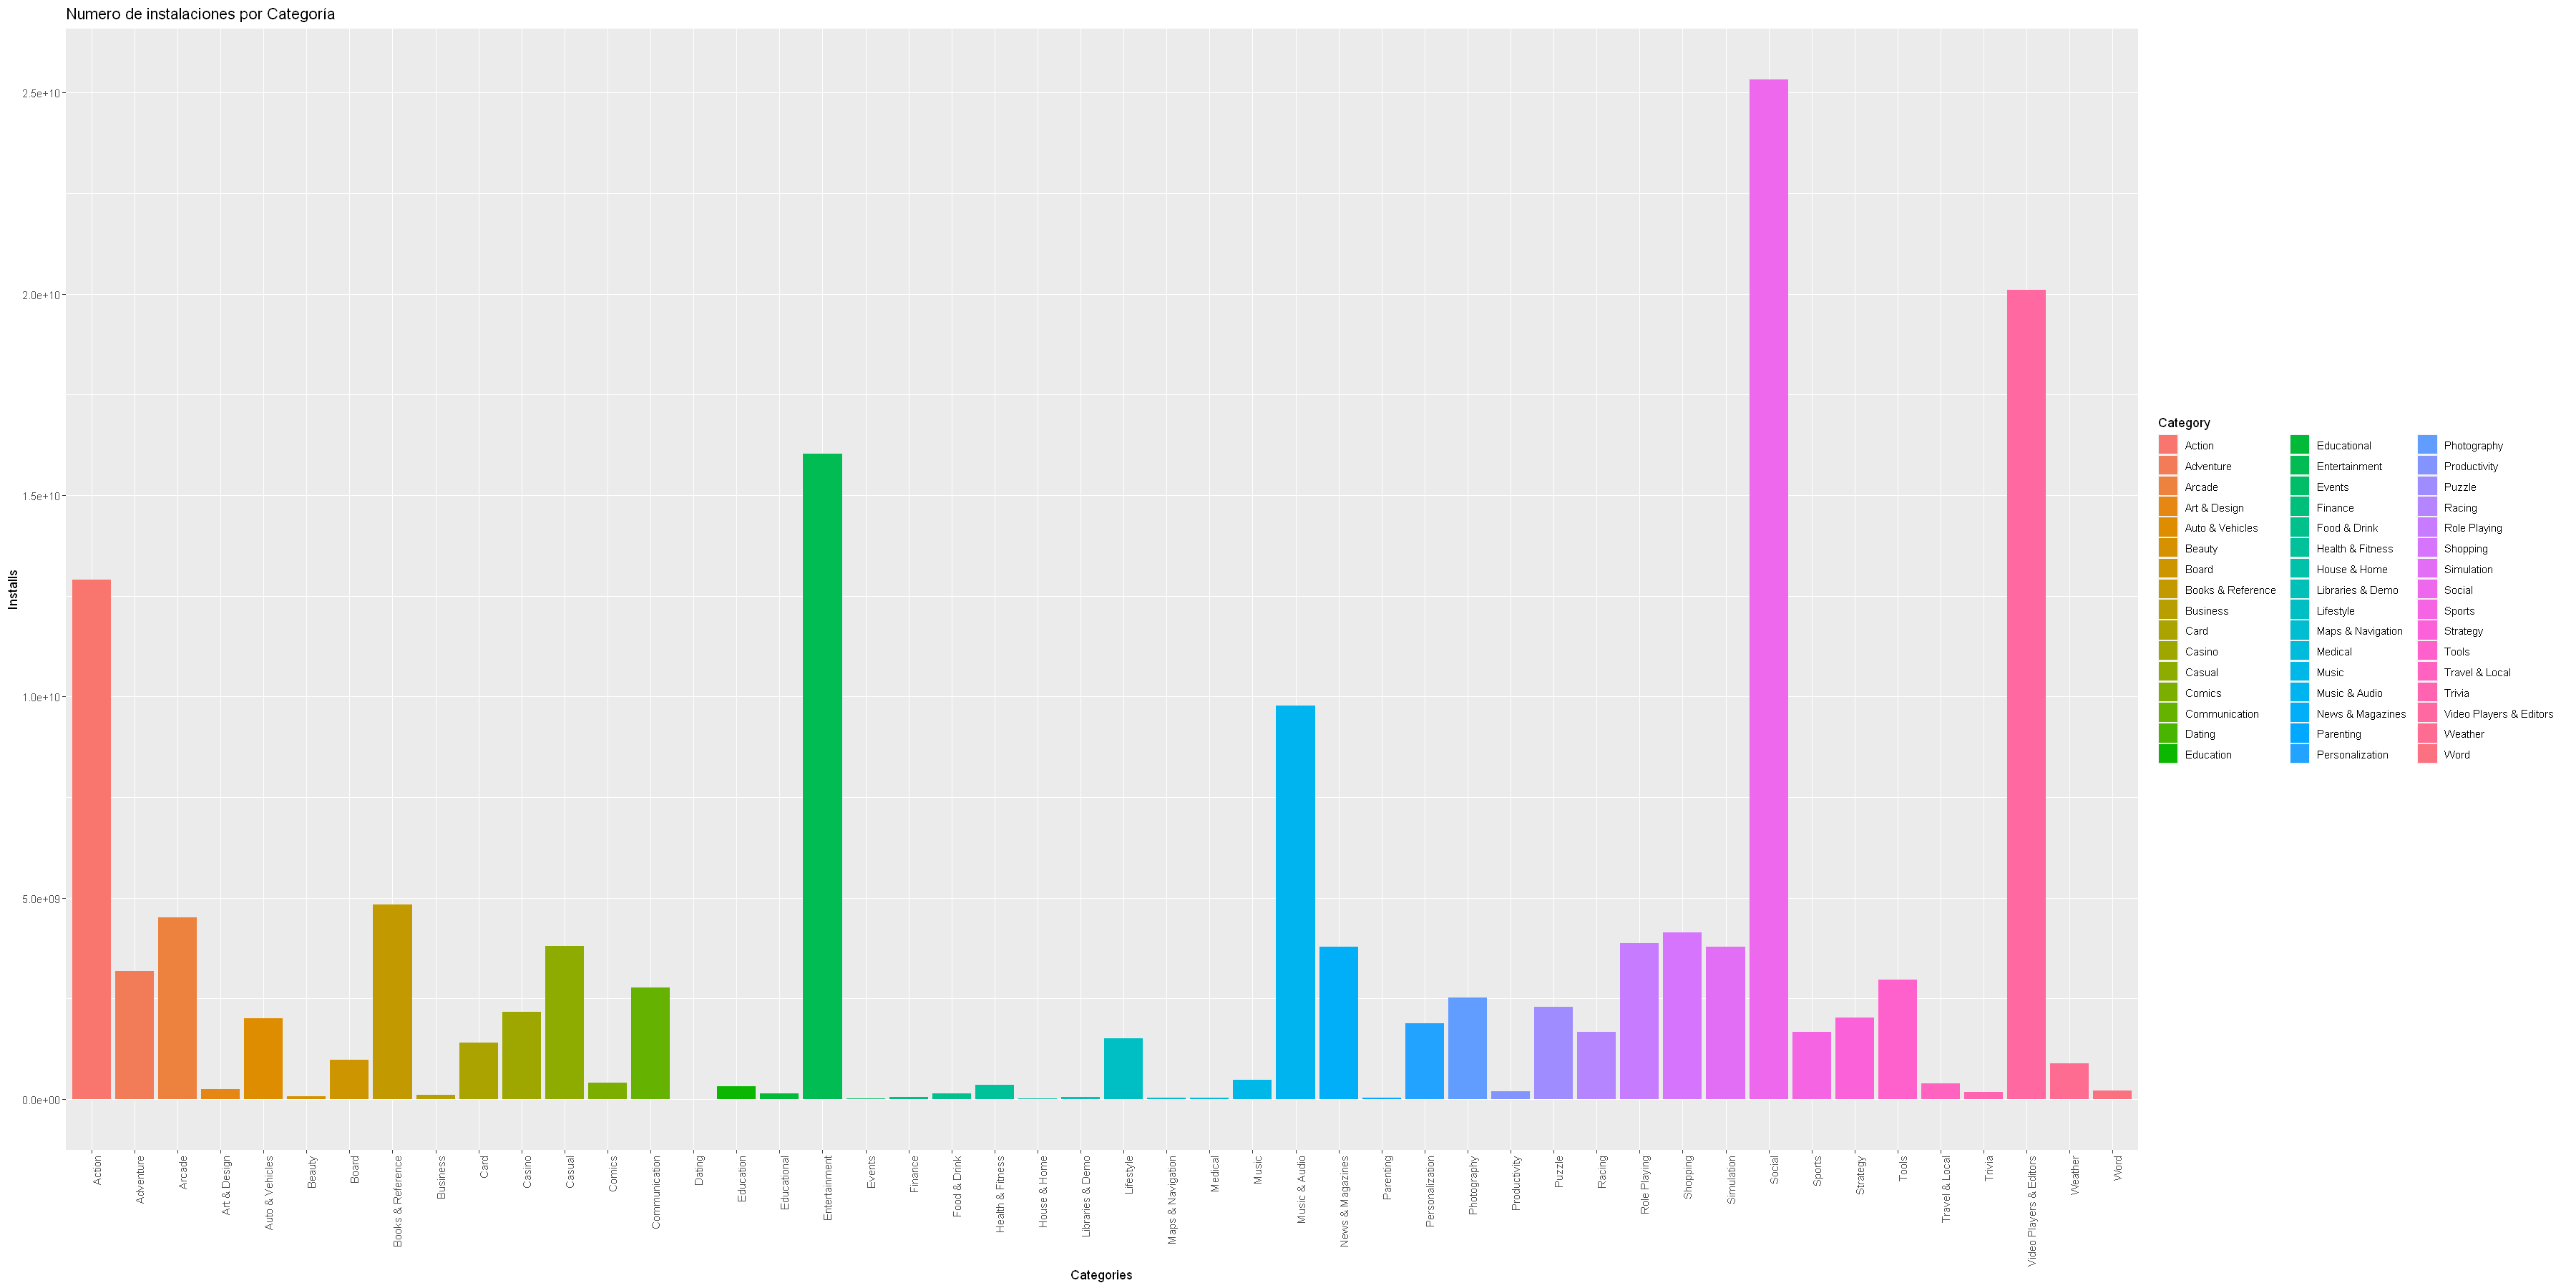

In [159]:
playstoreMax %>%
   ggplot(aes(x= Category, y = install.sum, fill=Category)) +
   geom_col() +
   ggtitle("Numero de instalaciones por Categoría") +
   xlab("Categories") + ylab("Installs") +
   theme(axis.text.x = element_text(angle = 90, hjust = 1))

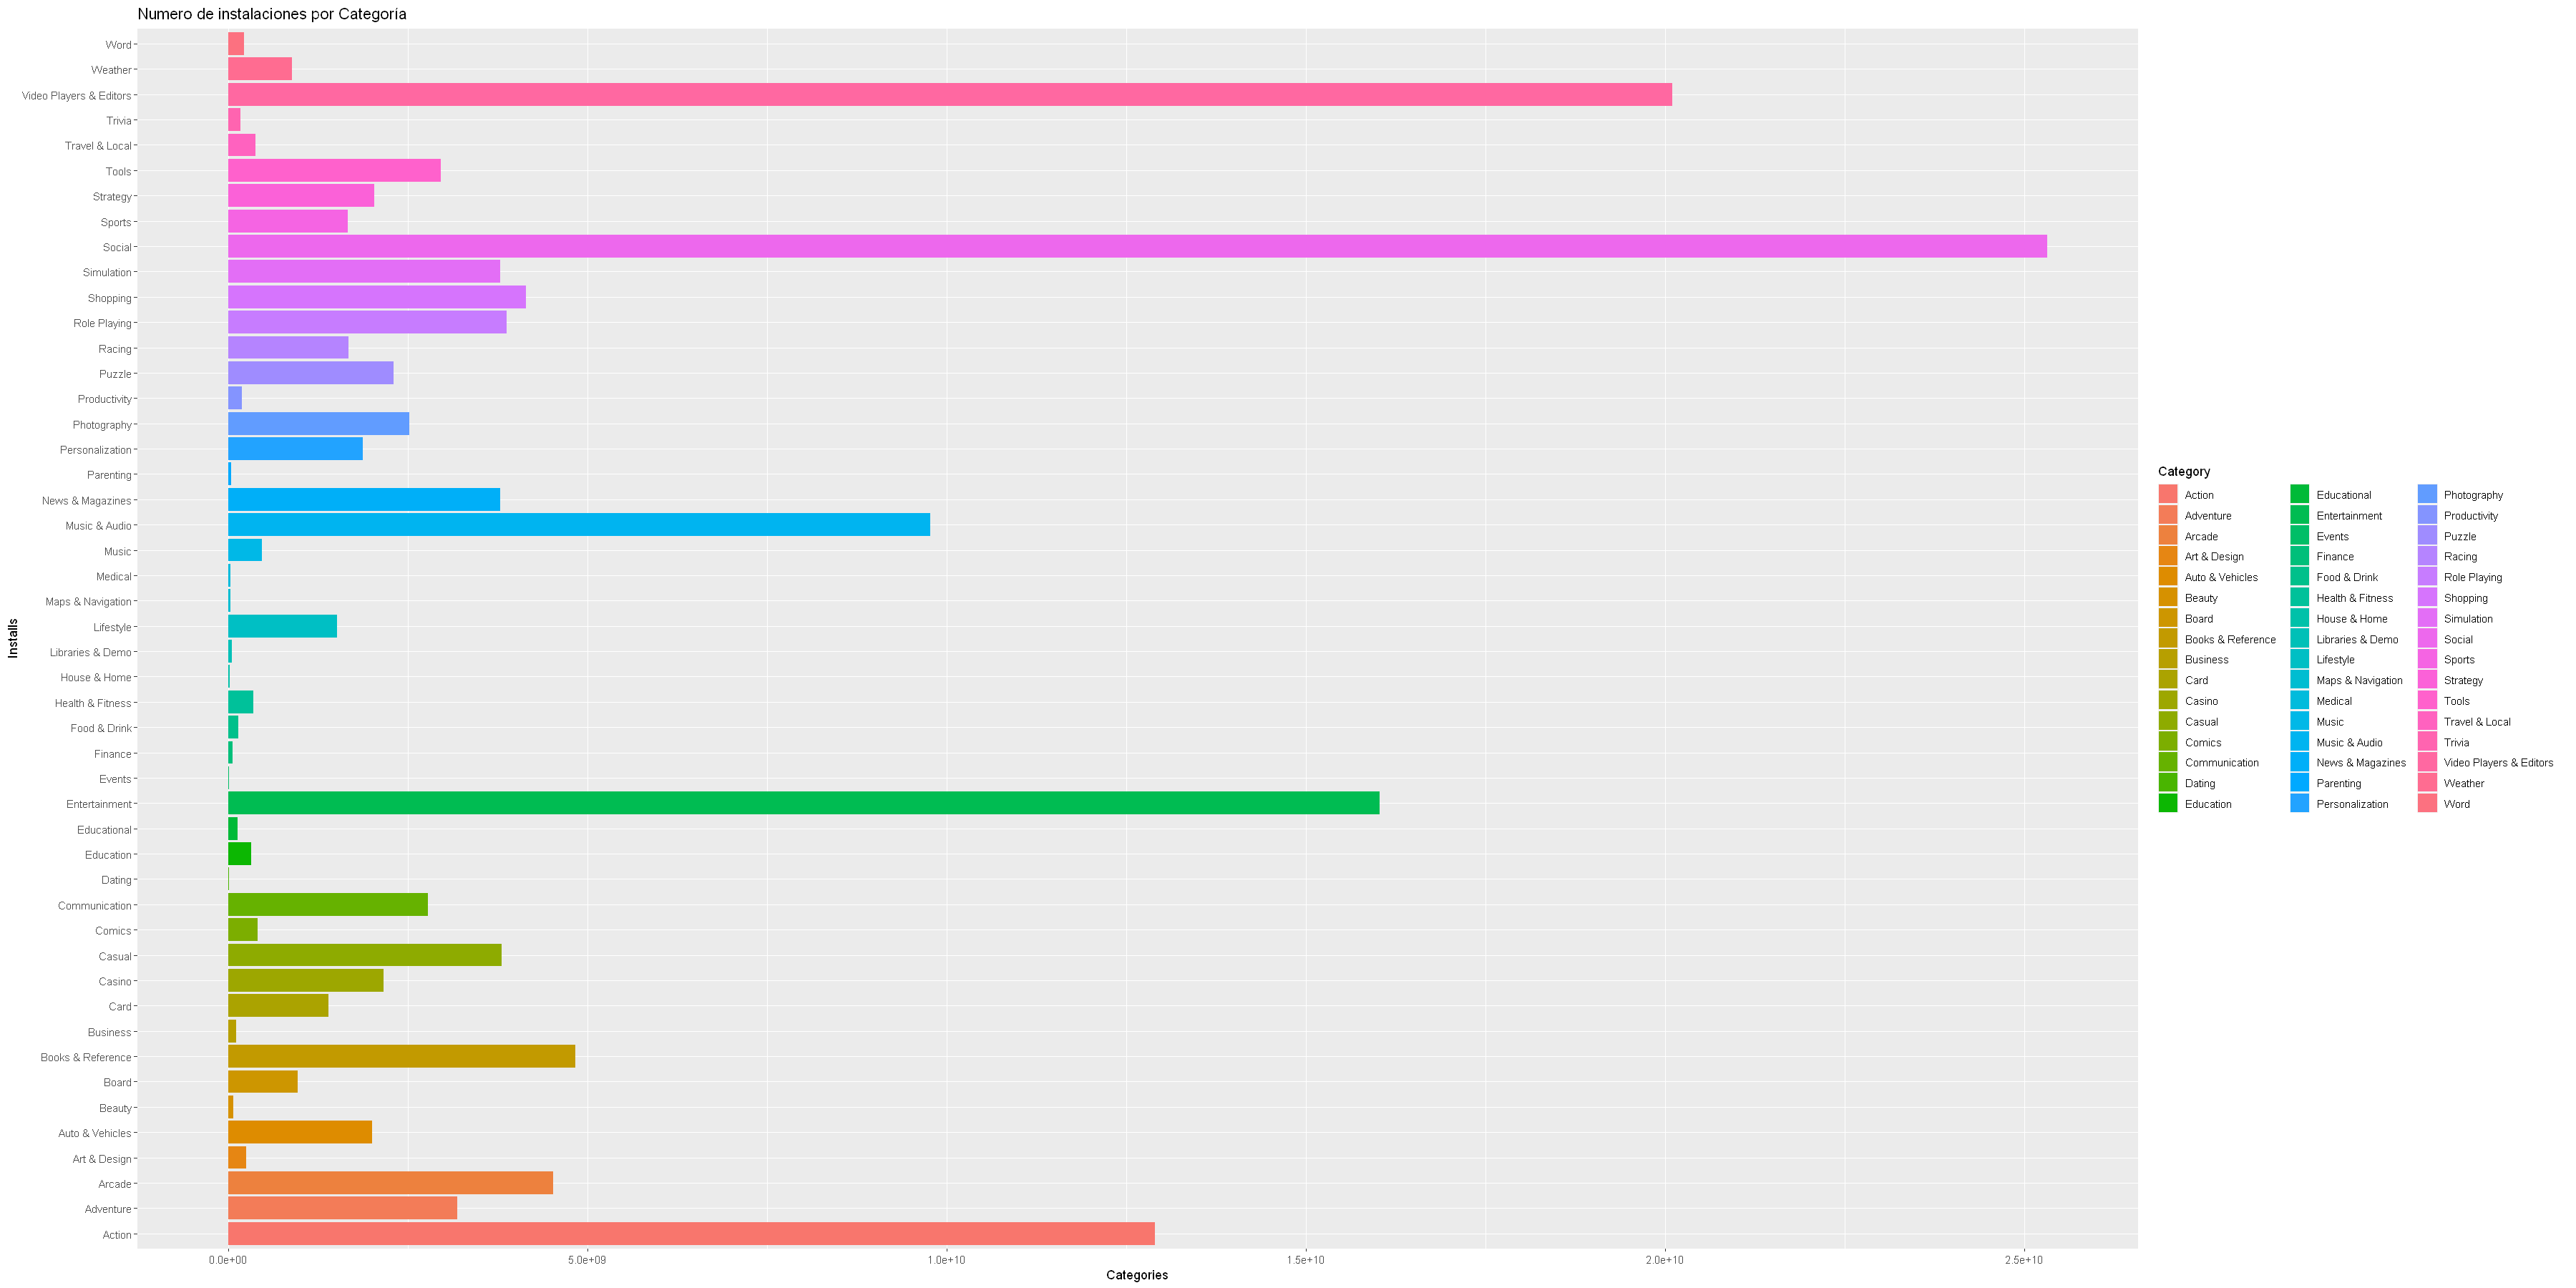

In [160]:
playstoreMax %>%
   ggplot(aes(x= Category, y = install.sum, fill=Category)) +
   geom_col() +
   ggtitle("Numero de instalaciones por Categoría") +
   xlab("Installs") + ylab("Categories") +
   coord_flip()

In [161]:
playstoreMax %>%
   arrange(desc(install.sum)) %>%
   head(10)

Category,install.max,install.sum
<chr>,<dbl>,<dbl>
Social,6782619635,25322267165
Video Players & Editors,9766230924,20105007597
Entertainment,4605543029,16030749557
Action,505818718,12895565313
Music & Audio,1067343725,9768754536
Books & Reference,3202676731,4835041812
Arcade,390613416,4521358537
Shopping,581776749,4149227251
Role Playing,153947521,3873885023


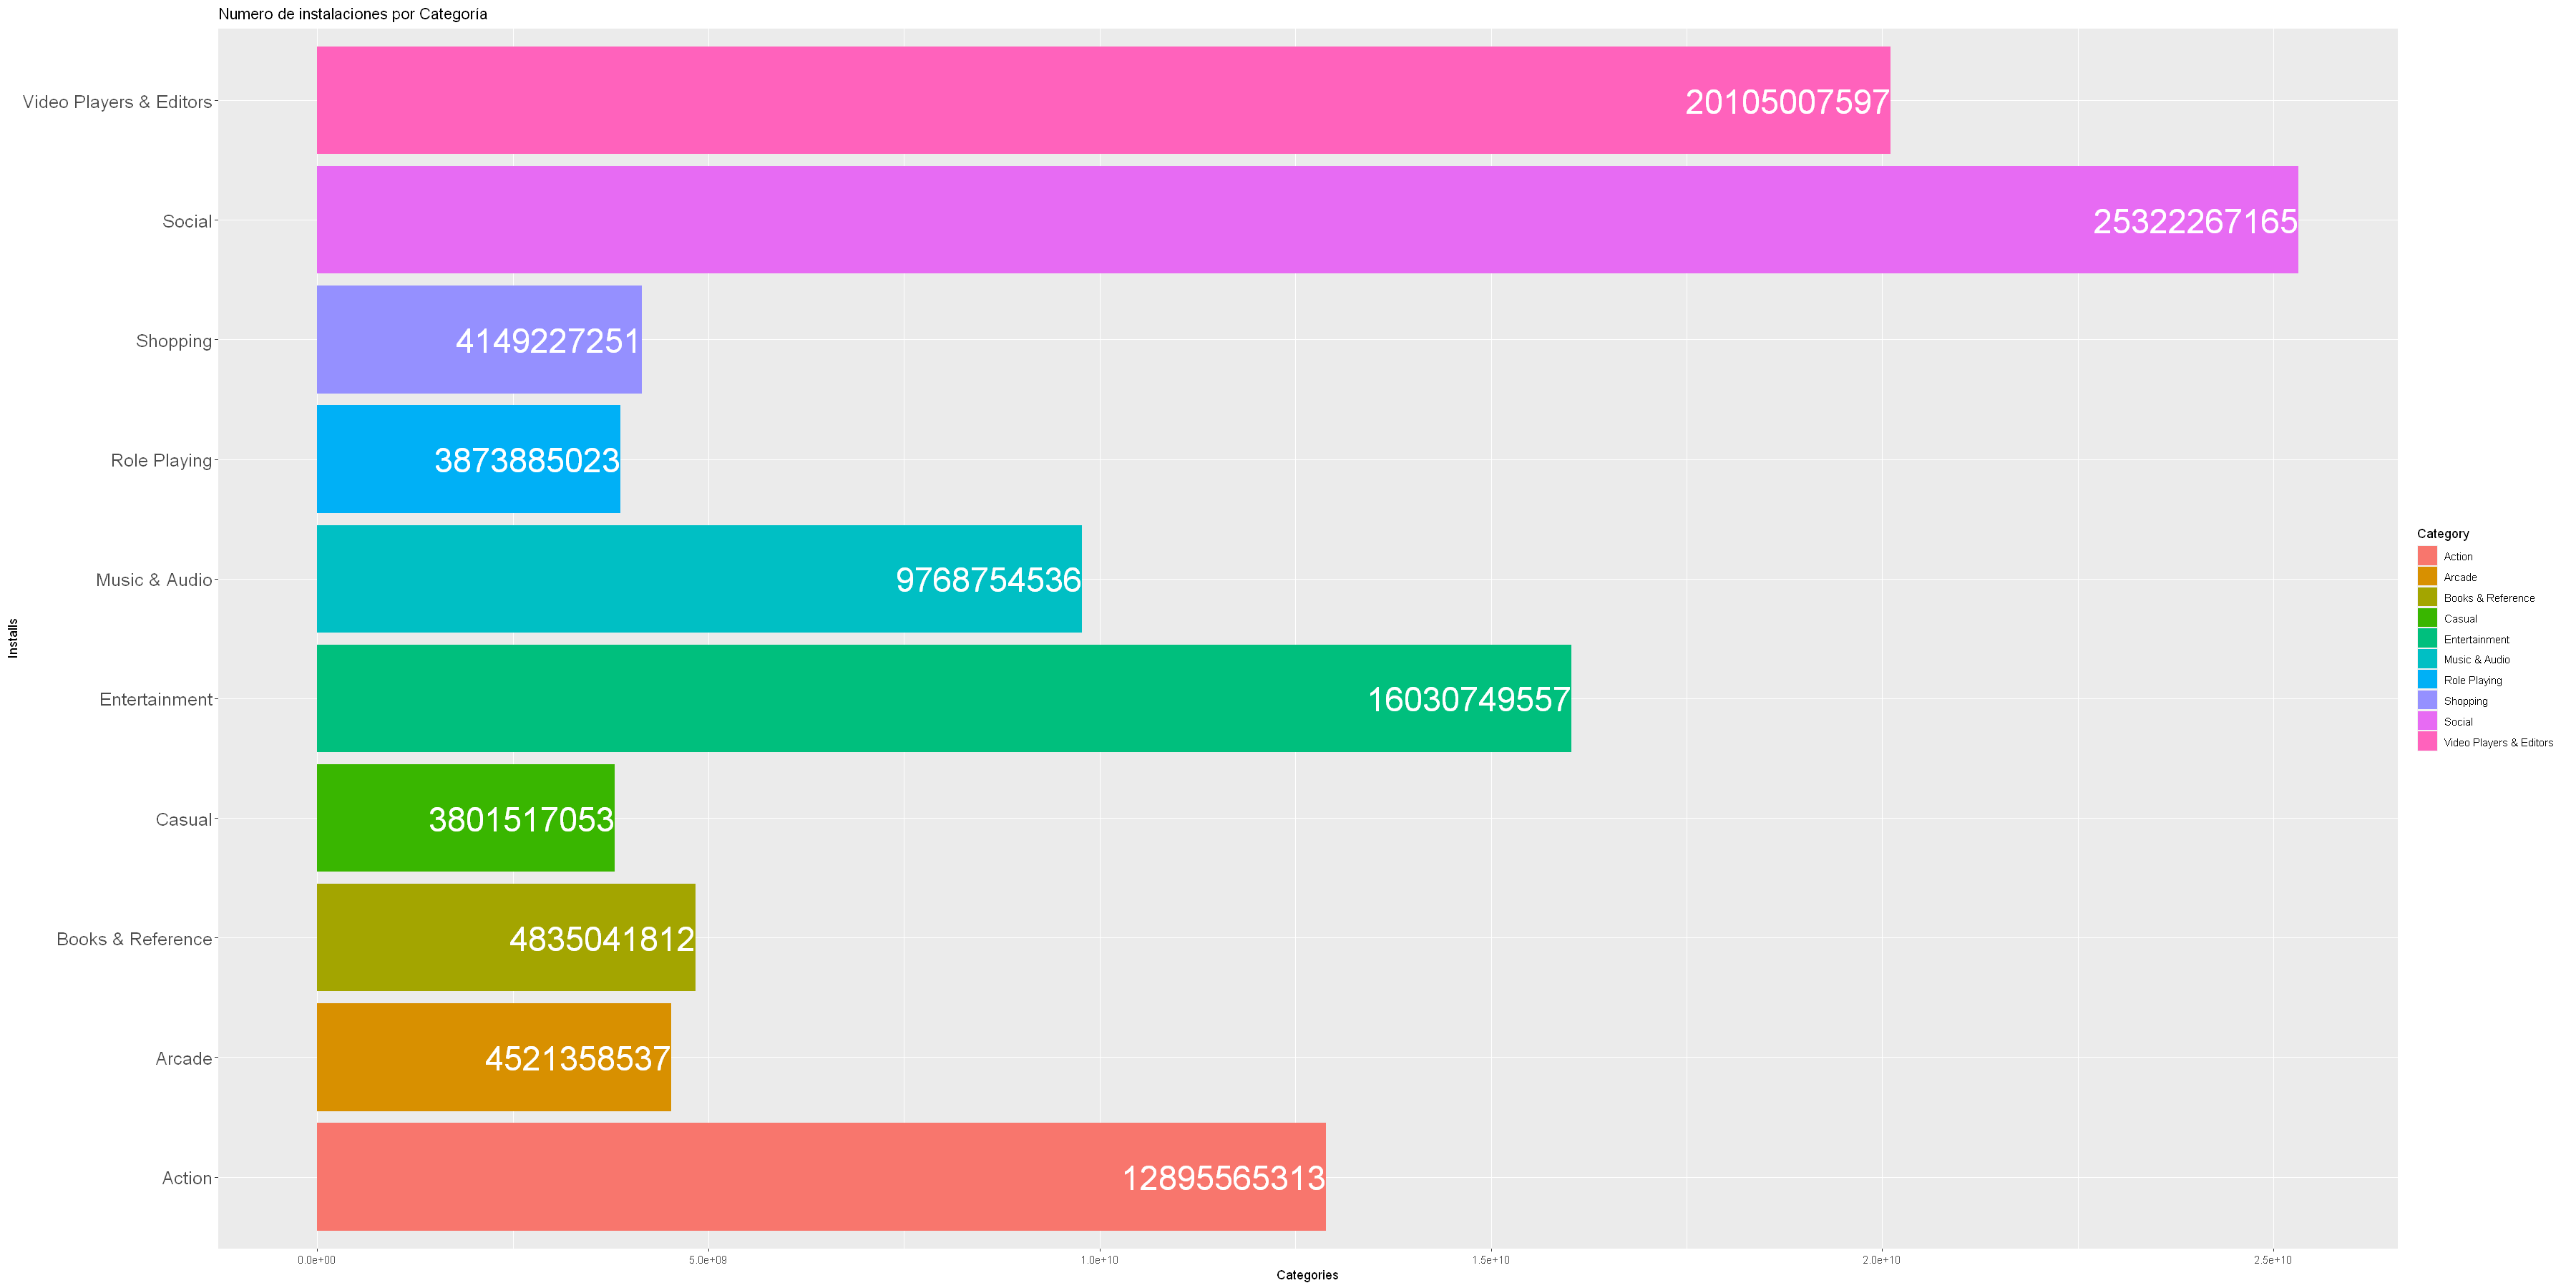

In [162]:
playstoreMax %>%
   arrange(desc(install.sum)) %>%
   head(10) %>%
   ggplot(aes(x= Category, y = install.sum, fill=Category)) +
   geom_col() +
   geom_text(aes(label = install.sum), hjust = 1, size= 10, colour = "white") +
   theme(axis.text.y = element_text(size = 15))+
   ggtitle("Numero de instalaciones por Categoría") +
   xlab("Installs") + ylab("Categories") +
   coord_flip()

In [163]:
playstore %>%
   filter(Maximum.Installs == install.max) %>%
   arrange(desc(install.sum)) %>%
   head(10)


App.Name,Category,Installs,Minimum.Installs,Maximum.Installs,Free,Price,Currency,Released,Last.Updated,Content.Rating,install.max,install.sum,installs.bins,installSum.bins
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>
Facebook,Social,"5,000,000,000+",5e+09,6782619635,True,0,USD,,"Jun 16, 2021",Teen,6782619635,25322267165,"(6782000000,6783000000]","(25322000000,25323000000]"
YouTube,Video Players & Editors,"5,000,000,000+",5e+09,9766230924,True,0,USD,"Oct 20, 2010","Jun 16, 2021",Teen,9766230924,20105007597,"(9766000000,9767000000]","(20105000000,20106000000]"
Google Play Games,Entertainment,"1,000,000,000+",1e+09,4605543029,True,0,USD,"Jul 24, 2013","Apr 26, 2021",Teen,4605543029,16030749557,"(4605000000,4606000000]","(16030000000,16031000000]"
PUBG MOBILE - Traverse,Action,"500,000,000+",5e+08,505818718,True,0,USD,"Mar 19, 2018","May 10, 2021",Teen,505818718,12895565313,"(505000000,506000000]","(12895000000,12896000000]"
YouTube Music,Music & Audio,"1,000,000,000+",1e+09,1067343725,True,0,USD,"Nov 12, 2015","Jun 14, 2021",Teen,1067343725,9768754536,"(1067000000,1068000000]","(9768000000,9769000000]"
"Google Play Books - Ebooks, Audiobooks, and Comics",Books & Reference,"1,000,000,000+",1e+09,3202676731,True,0,USD,"Dec 6, 2010","Jun 11, 2021",Teen,3202676731,4835041812,"(3202000000,3203000000]","(4835000000,4836000000]"
Hungry Shark Evolution - Offline survival game,Arcade,"100,000,000+",1e+08,390613416,True,0,USD,"Feb 22, 2013","Jun 14, 2021",Teen,390613416,4521358537,"(390000000,391000000]","(4521000000,4522000000]"
Wish - Shopping Made Fun,Shopping,"500,000,000+",5e+08,581776749,True,0,USD,"Jul 26, 2012","Jun 10, 2021",Teen,581776749,4149227251,"(581000000,582000000]","(4149000000,4150000000]"
Cat Runner: Decorate Home,Role Playing,"100,000,000+",1e+08,153947521,True,0,USD,"Nov 3, 2017","May 21, 2021",Teen,153947521,3873885023,"(153000000,154000000]","(3873000000,3874000000]"


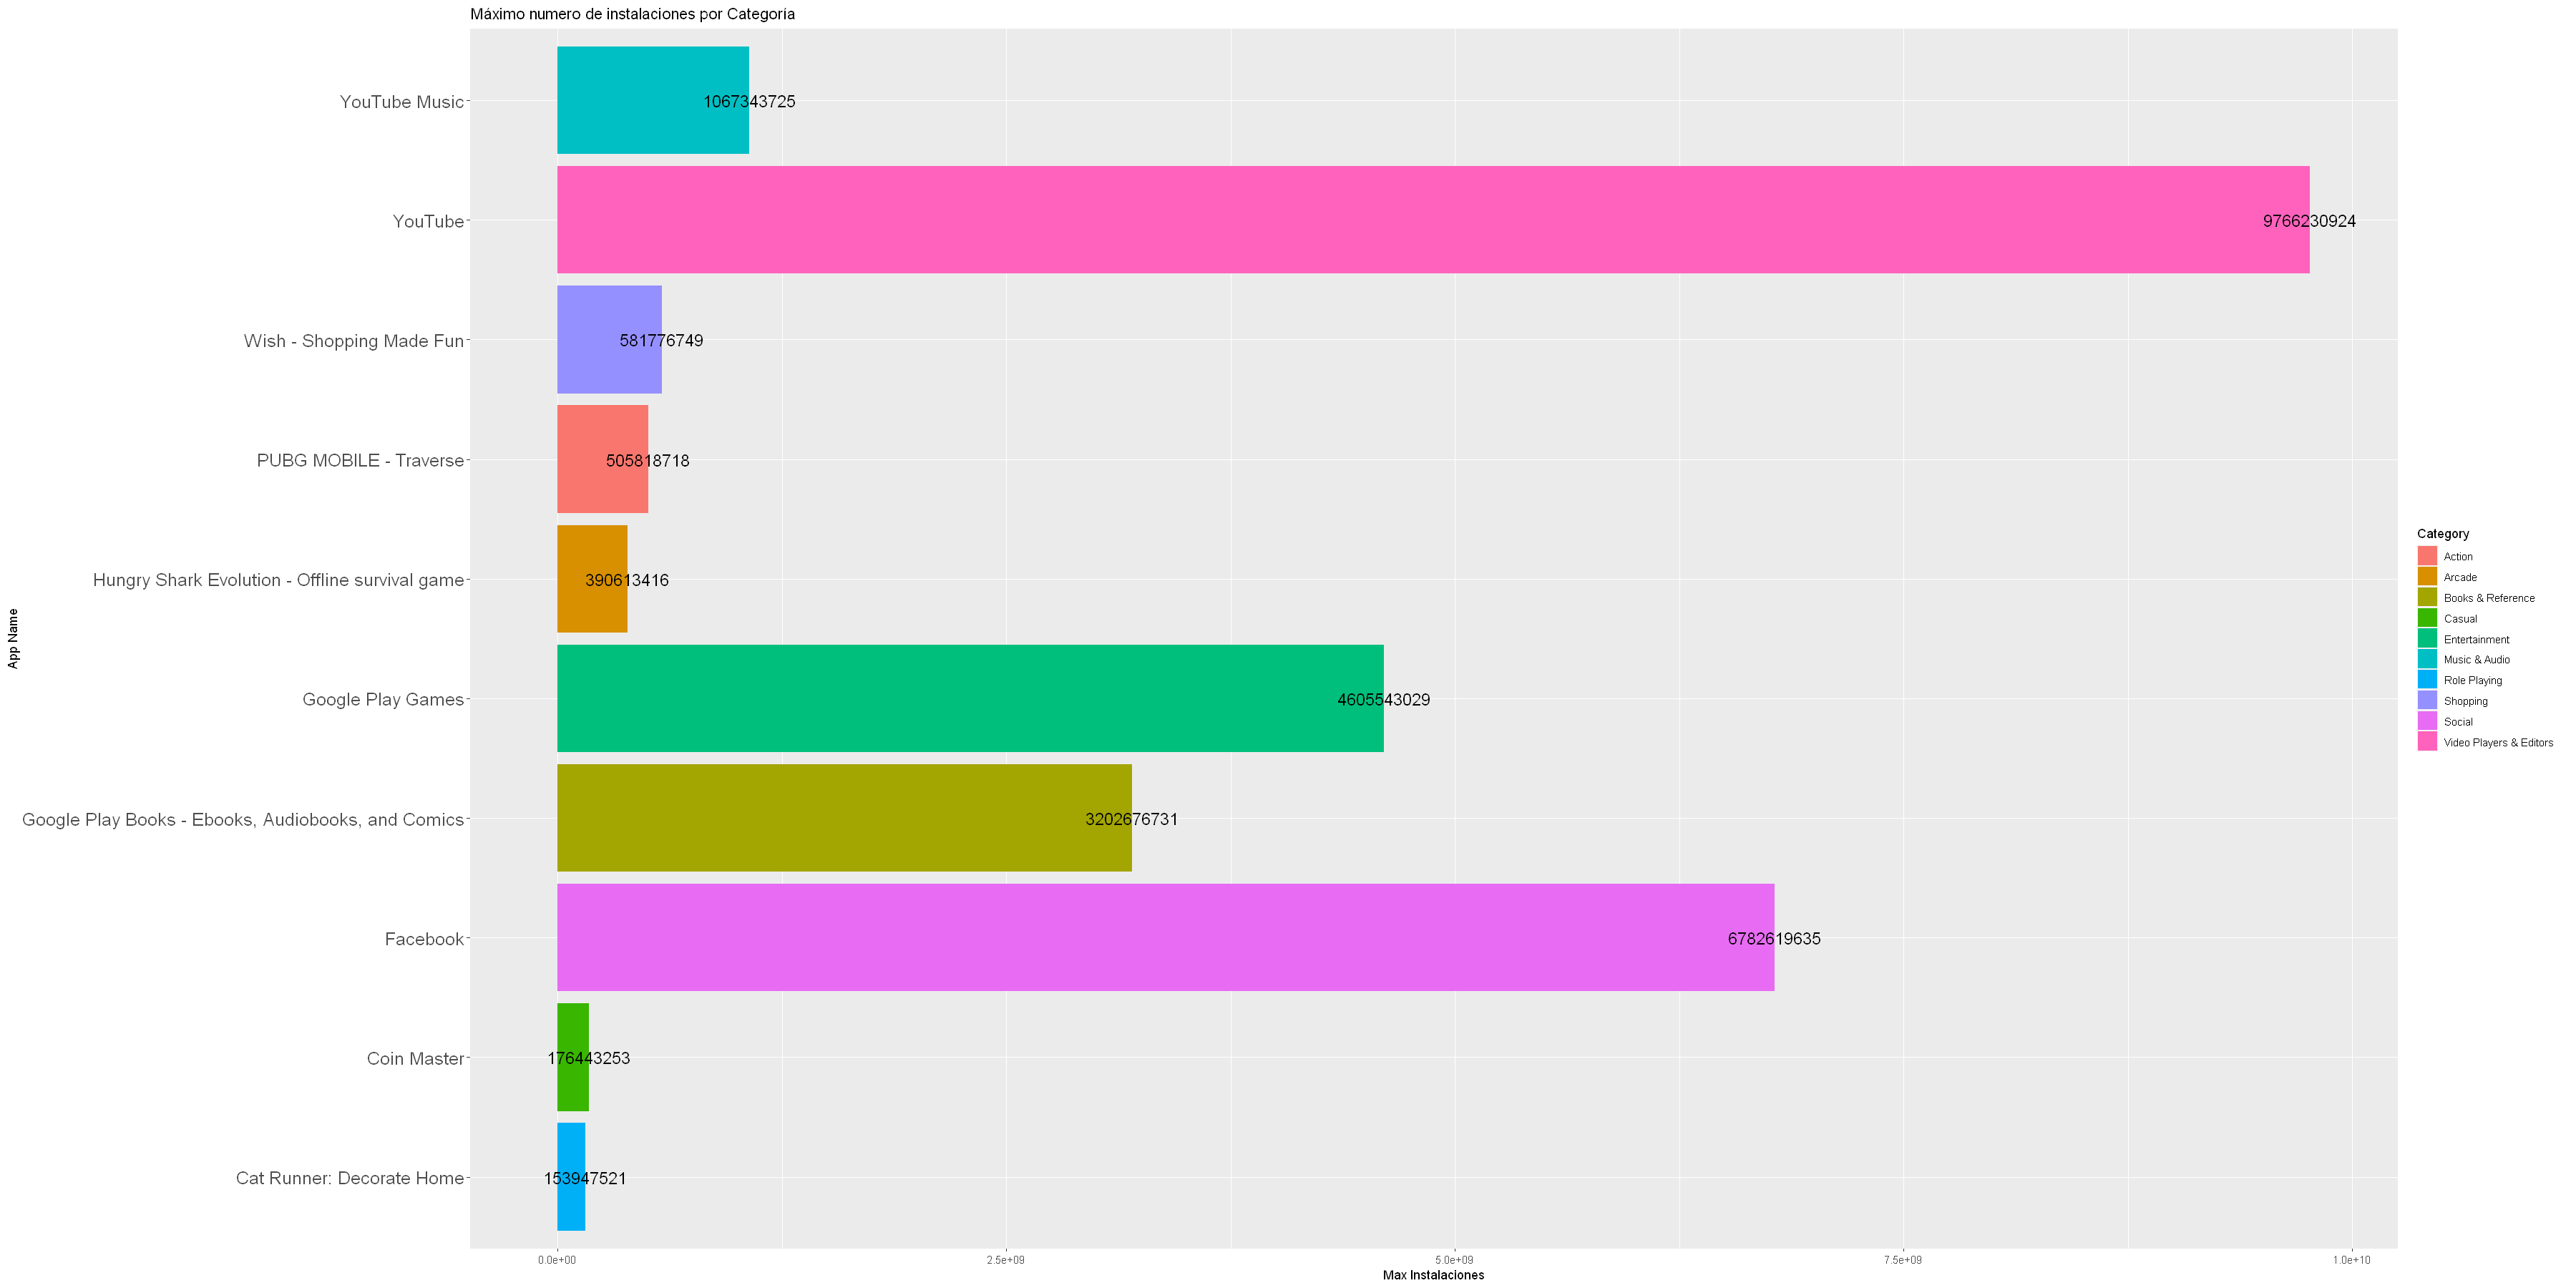

In [164]:
playstore %>%
   filter(Maximum.Installs == install.max) %>%
   arrange(desc(install.sum)) %>%
   head(10) %>%
   ggplot(aes(x= App.Name, y = Maximum.Installs, fill=Category)) +
   geom_col() +
   geom_text(aes(label = Maximum.Installs), size= 5) +
   theme(axis.text.y = element_text(size = 15))+
   ggtitle("Máximo numero de instalaciones por Categoría") +
   xlab("App Name") + ylab("Max Instalaciones") +
   coord_flip()